Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('clothes_price_data.csv')

Initial Data Understanding

In [3]:
df.head(10)

,ItemID,ItemName,Brand,Category,Size,Price
0,1,Jacket,BrandB,Outerwear,M,75.07
1,2,T-Shirt,BrandE,Footwear,S,45.61
2,3,Jeans,BrandE,Footwear,S,114.02
3,4,Shoes,BrandD,Footwear,S,52.76
4,5,Jeans,BrandC,Bottomwear,S,159.53
5,6,T-Shirt,BrandE,Bottomwear,XS,92.71
6,7,Jacket,BrandC,Outerwear,L,17.66
7,8,Shoes,BrandA,Dresses,XL,19.47
8,9,T-Shirt,BrandE,Topwear,M,168.83
9,10,Jeans,BrandD,Footwear,XL,11.86


In [4]:
df.drop('ItemID',axis=1,inplace=True)

In [5]:
df.shape

(500, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ItemName  500 non-null    object 
 1   Brand     500 non-null    object 
 2   Category  500 non-null    object 
 3   Size      500 non-null    object 
 4   Price     500 non-null    float64
dtypes: float64(1), object(4)
memory usage: 19.7+ KB


In [7]:
df.describe()

,Price
count,500.00000
mean,109.85000
std,54.94146
min,10.39000
25%,62.76500
50%,112.00000
75%,159.05750
max,199.47000


In [8]:
df.dtypes

ItemName     object
Brand        object
Category     object
Size         object
Price       float64
dtype: object

Null values and duplicate values check

In [9]:
df.isnull().sum()

ItemName    0
Brand       0
Category    0
Size        0
Price       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['Brand'].unique()

array(['BrandB', 'BrandE', 'BrandD', 'BrandC', 'BrandA'], dtype=object)

In [12]:
df['Size'].unique()

array(['M', 'S', 'XS', 'L', 'XL'], dtype=object)

In [13]:
df['Category'].unique()

array(['Outerwear', 'Footwear', 'Bottomwear', 'Dresses', 'Topwear'],
      dtype=object)

Outlier check

<Axes: >

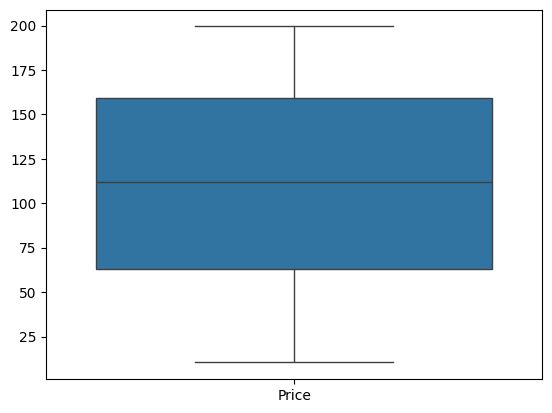

In [14]:
sns.boxplot(df)

EDA

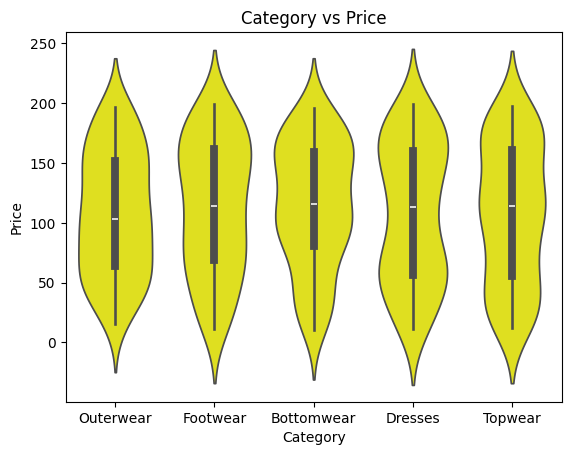

In [20]:
sns.violinplot(x='Category',y='Price',data=df, color='yellow')
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Category vs Price')
plt.show()

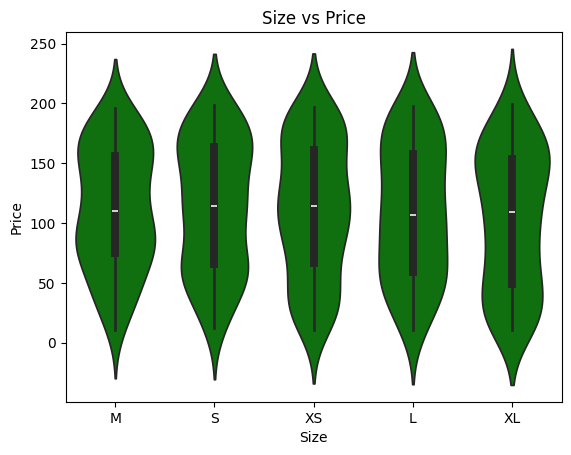

In [21]:
sns.violinplot(x='Size',y='Price',data=df, color='green')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs Price')
plt.show()

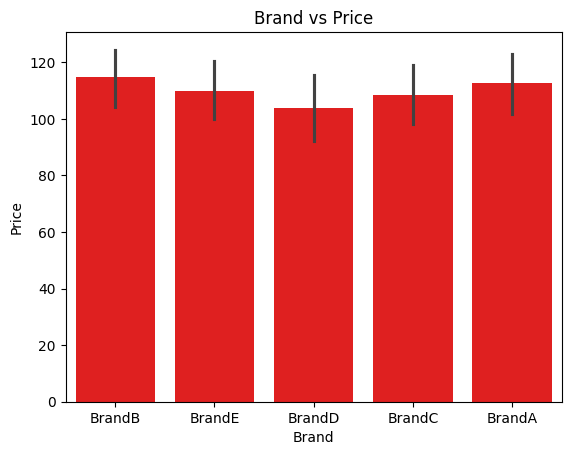

In [22]:
sns.barplot(x='Brand',y='Price',data=df,estimator=np.mean,color='red')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand vs Price')
plt.show()

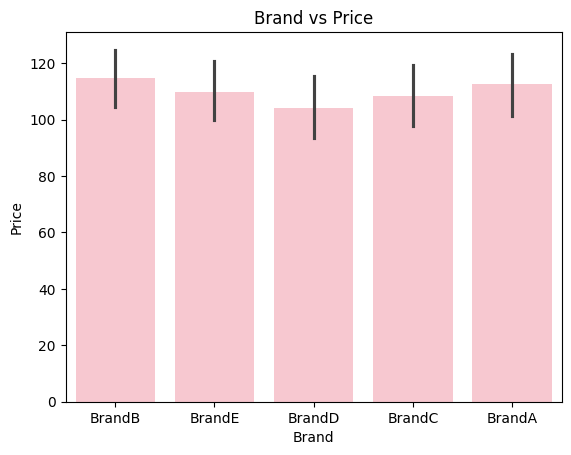

In [26]:
sns.barplot(x='Brand',y='Price',data=df,color='pink',estimator=np.mean)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand vs Price')
plt.show()

Data Preprocessing - Feature Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Size'] = le.fit_transform(df['Size'])
df['Category'] = le.fit_transform(df['Category'])
df['ItemName'] = le.fit_transform(df['ItemName'])

In [29]:
df.head(10)

,ItemName,Brand,Category,Size,Price
0,1,1,3,1,75.07
1,4,4,2,2,45.61
2,2,4,2,2,114.02
3,3,3,2,2,52.76
4,2,2,0,2,159.53
5,4,4,0,4,92.71
6,1,2,3,0,17.66
7,3,0,1,3,19.47
8,4,4,4,1,168.83
9,2,3,2,3,11.86


Correlation Analysis

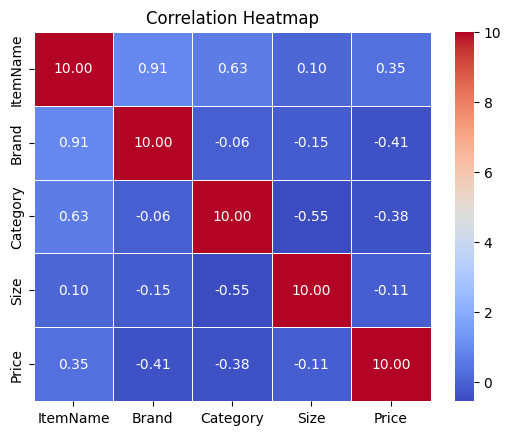

In [32]:
sns.heatmap(df.corr()*10,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Feature Split

In [33]:
X = df.drop('Price',axis=1)
y = df['Price']

Train and Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Gradient Boost Regressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

Model Prediction GBR

In [37]:
y_pred = model.predict(X_test)

Model R2Score GBR

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
print(mse)
print(r2)

3418.6455899024872
-0.15569049793096879


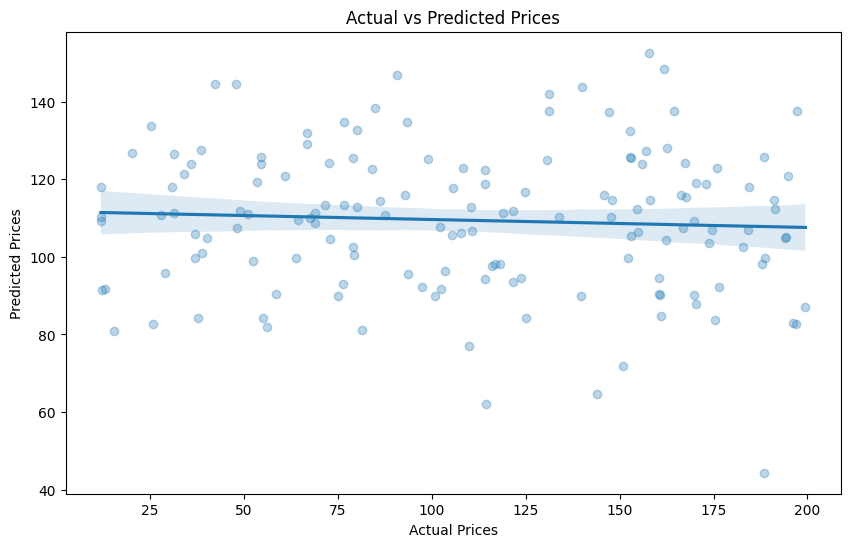

In [57]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

Model Training and Building RFR

In [41]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Model Training RFR

In [42]:
y_pred1 = model.predict(X_test)

Model R2Score, MSE

In [58]:
print(r2_score(y_test, y_pred1))
print(mean_squared_error(y_test, y_pred1))

-0.18639079158094085
3509.460062880404


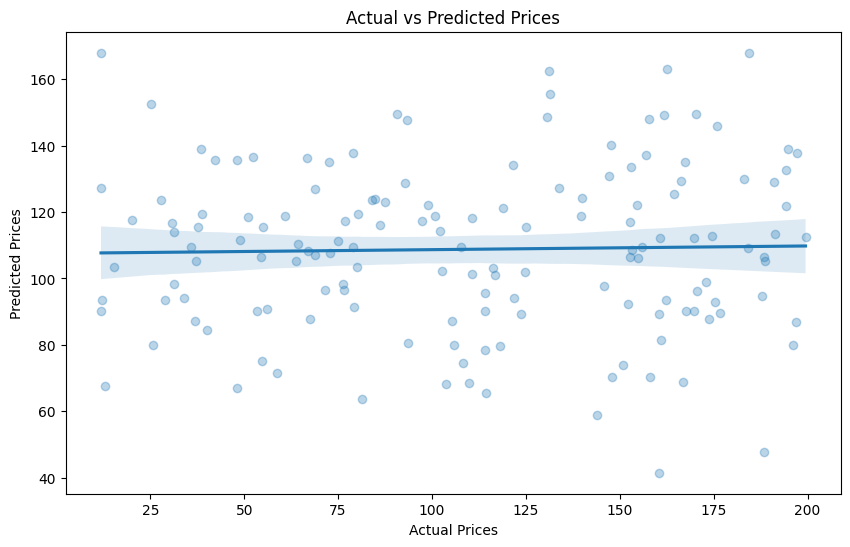

In [59]:
# prompt: code to generate a regplot comapring y_test and y_pred for randomforestregressor

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred1, scatter_kws={'alpha':0.3})
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


Model Building ABR

In [51]:
from sklearn.ensemble import AdaBoostRegressor
model1 = AdaBoostRegressor()
model1.fit(X_train, y_train)

AdaBoostRegressor()

Model Traning

In [52]:
y_pred3 = model1.predict(X_test)

Model R2Score, MSE

In [64]:
print(r2_score(y_test, y_pred3))

-0.026931862461856415


In [65]:
print(mean_squared_error(y_test, y_pred3))

3037.7649457365987


Pickling the Model

In [63]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(model1, open('model1.pkl', 'wb'))